In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=901d1ec22cb17806e825056e063271da9e6b80547615a93116cc831005fadb67
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install fbprophet

In [ ]:
import yfinance
import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
data = yfinance.download('TRIS3.SA', start = '2020-06-01', end = datetime.datetime.today(), interval= '1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,8.05,8.44,7.89,8.30,8.30,1696600
2020-06-02,8.40,9.07,8.34,8.98,8.98,3642300
2020-06-03,9.32,10.71,9.20,10.67,10.67,5383200
2020-06-04,10.64,11.02,10.00,10.56,10.56,3447200
2020-06-05,11.14,11.42,10.37,10.62,10.62,2993900
...,...,...,...,...,...,...
2021-04-16,10.11,10.23,10.08,10.19,10.19,670600
2021-04-19,10.19,10.30,10.08,10.23,10.23,763100
2021-04-20,10.24,10.29,10.00,10.03,10.03,1232400


In [ ]:
df = pd.DataFrame()

In [ ]:
df['y'] = data["Adj Close"]

In [ ]:
df['ds'] = data.index

In [ ]:
df

,y,ds
Date,,
2020-06-01,33.669998,2020-06-01
2020-06-02,36.860001,2020-06-02
2020-06-03,39.869999,2020-06-03
2020-06-04,39.500000,2020-06-04
2020-06-05,38.630001,2020-06-05
...,...,...
2021-04-14,32.810001,2021-04-14
2021-04-15,33.630001,2021-04-15
2021-04-16,34.080002,2021-04-16


In [ ]:
from fbprophet import Prophet

In [ ]:
modelo = Prophet(daily_seasonality= True)

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


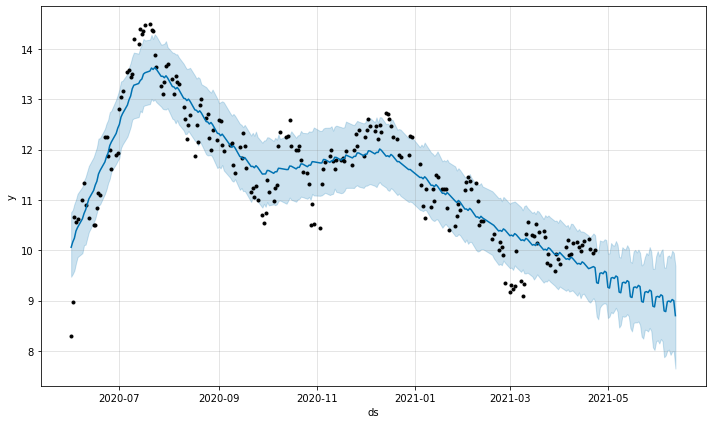

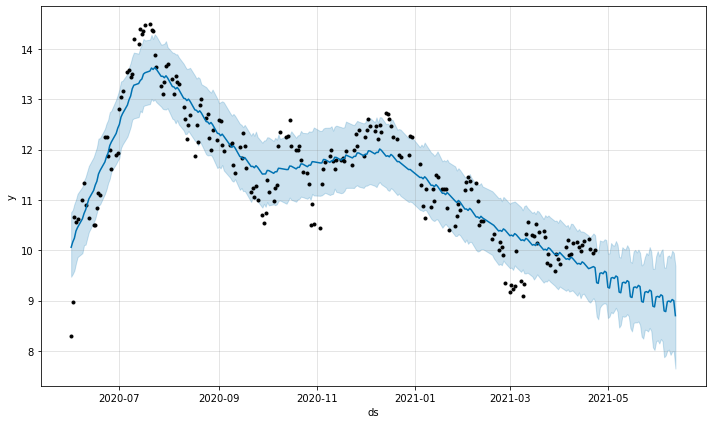

In [ ]:
futuro = modelo.make_future_dataframe(periods= 50)
predictions = modelo.predict(futuro)
modelo.plot(predictions)

In [ ]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1093,2021-12-29,67593.110890,46006.403126,86626.609172,47275.967867,88025.401275,-1321.311065,-1321.311065,-1321.311065,-1745.354456,-1745.354456,-1745.354456,35.140223,35.140223,35.140223,388.903167,388.903167,388.903167,0.0,0.0,0.0,66271.799825
1094,2021-12-30,67703.226023,46039.309186,87306.885292,47298.480622,88194.572787,-1160.670865,-1160.670865,-1160.670865,-1745.354456,-1745.354456,-1745.354456,-19.485789,-19.485789,-19.485789,604.169379,604.169379,604.169379,0.0,0.0,0.0,66542.555157
1095,2021-12-31,67813.341155,46293.600854,87303.723957,47298.923020,88398.378234,-936.531354,-936.531354,-936.531354,-1745.354456,-1745.354456,-1745.354456,2.753190,2.753190,2.753190,806.069911,806.069911,806.069911,0.0,0.0,0.0,66876.809801
1096,2022-01-01,67923.456288,46343.217598,87981.678834,47300.747649,88602.183681,-719.193276,-719.193276,-719.193276,-1745.354456,-1745.354456,-1745.354456,32.929547,32.929547,32.929547,993.231633,993.231633,993.231633,0.0,0.0,0.0,67204.263012
1097,2022-01-02,68033.571420,46786.012886,88388.389305,47323.871096,88805.989129,-630.756716,-630.756716,-630.756716,-1745.354456,-1745.354456,-1745.354456,-49.953771,-49.953771,-49.953771,1164.551511,1164.551511,1164.551511,0.0,0.0,0.0,67402.814704


In [ ]:
!pip install git+https://github.com/ourownstory/neural_prophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
test_lenght = 30
df_train = df.iloc[:-test_lenght]
df_test = df.iloc[-test_lenght:]

In [ ]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit()